<a href="https://colab.research.google.com/github/AbhiraamiK/time-series-apple-stock-prediction-rnn-lstm/blob/main/RNN_and_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *STOCK PRICE PREDICTION using RNN and LSTM*

In [ ]:
import yfinance as yf #import Libraries

In [ ]:
yf.__version__#to check the version

'0.2.61'

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [ ]:
#downloading historical stock data using yfinance library
ticker = "AAPL" #apple company stock code
start_date = "2015-01-01"
end_date = "2021-12-31"

In [ ]:
# to fetch the data
stock_data=yf.download(ticker, start = start_date, end = end_date)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [ ]:
print(f"Downloaded {len(stock_data)} days of {ticker} stock date")

Downloaded 1762 days of AAPL stock date


In [ ]:
print("show few data ")
stock_data.head()

show few data 


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-01-02,24.288582,24.757336,23.848707,24.746228,212818400
2015-01-05,23.604330,24.137511,23.417718,24.057533,257142000
2015-01-06,23.606552,23.866477,23.244433,23.668756,263188400
2015-01-07,23.937569,24.037539,23.704302,23.815381,160423600
2015-01-08,24.857317,24.915079,24.148631,24.266376,237458000


In [ ]:
#description of the data:
#open-price: price of the share when the open-time
#low-price: price of the share when the price went low on the particular day
#high-price: price of the share when the price went high on the particular day
#close-price: price of the share when the close-time
#volume: no. of shares traded on the day

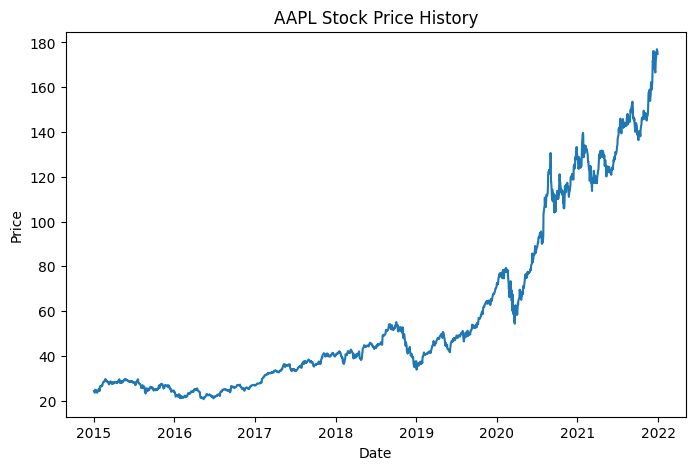

In [ ]:
#visualize the closing price of appl for the period 2015 to 2021.
#we need to analyze the stocks if they are increasing or decreasing so we take closing price and date.
#-----------------------------------------------------------------------------------------------------
plt.figure(figsize=(8,5))
plt.plot(stock_data['Close'])
plt.title(f'{ticker} Stock Price History')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [ ]:
stock_data.columns

MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])

In [ ]:
stock_data_orig = stock_data.copy()
stock_data_orig.shape

(1762, 5)

In [ ]:
# to drop a multi level column
# ---------------------------
display(stock_data.head(2))
stock_data.columns = stock_data.columns.droplevel(1)
display(stock_data.head(2))

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-01-02,24.288582,24.757336,23.848707,24.746228,212818400
2015-01-05,23.604330,24.137511,23.417718,24.057533,257142000


Price,Close,High,Low,Open,Volume
Date,,,,,
2015-01-02,24.288582,24.757336,23.848707,24.746228,212818400
2015-01-05,23.604330,24.137511,23.417718,24.057533,257142000


In [ ]:
print(stock_data.columns)

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')


In [ ]:
data = stock_data.filter(['Close'])
print(type(data))
print(data)
#models like LSTM/RNN expect numerical input arrays instead of DataFrame.
# convert dataframe to numpy array
dataset = data.values
print(type(dataset))
print(dataset)

<class 'pandas.core.frame.DataFrame'>
                 Close
Date                  
2015-01-02   24.288582
2015-01-05   23.604330
2015-01-06   23.606552
2015-01-07   23.937569
2015-01-08   24.857317
...                ...
2021-12-23  173.021545
2021-12-27  176.996704
2021-12-28  175.975937
2021-12-29  176.064285
2021-12-30  174.906082

[1762 rows x 1 columns]
<class 'numpy.ndarray'>
[[ 24.28858185]
 [ 23.60433006]
 [ 23.60655212]
 ...
 [175.97593689]
 [176.06428528]
 [174.90608215]]


In [ ]:
print(stock_data.head(2))

Price           Close       High        Low       Open     Volume
Date                                                             
2015-01-02  24.288582  24.757336  23.848707  24.746228  212818400
2015-01-05  23.604330  24.137511  23.417718  24.057533  257142000


In [ ]:
#to split the data into train and test data set
len(dataset), len(dataset)*0.8, int(len(dataset)*0.8), np.ceil(len(dataset)*0.8), int(np.ceil(len(dataset)*0.8))

(1762, 1409.6000000000001, 1409, np.float64(1410.0), 1410)

In [ ]:
#to know how many observations are there in initial data set and training data set
training_data_len = int(np.ceil(len(dataset)*0.8))
print("Total initial observations:",len(dataset))
print("Total training observations:",training_data_len)

Total initial observations: 1762
Total training observations: 1410


In [ ]:
dataset

array([[ 24.28858185],
       [ 23.60433006],
       [ 23.60655212],
       ...,
       [175.97593689],
       [176.06428528],
       [174.90608215]])

Neural networks are sensitive to the scale of input features.

Scaling speeds up training, improves convergence, and prevents gradient issues.

Prevents features with larger values (e.g., prices) from dominating smaller features.

In [ ]:
#preprocessing - normalisation using MinMaxScalar
#MinMaxScalar scales all values to a range between 0 and 1
#formula: x(scaled)=x-x(min)/x(max)-x(min)
#neural networks like LSTM perform better when data is normalized
from sklearn.preprocessing import MinMaxScaler
# perform scaling on the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(dataset)

print(scaled_data[:5]) #slicing technique to check

[[0.02328843]
 [0.018912  ]
 [0.01892621]
 [0.02104337]
 [0.02692602]]


In [ ]:
# split the data and CREATE the training dataset
# -------------------------------------------
train_data = scaled_data[0:training_data_len, :]
train_data.shape

(1410, 1)

In [ ]:
train_data

array([[0.02328843],
       [0.018912  ],
       [0.01892621],
       ...,
       [0.55223096],
       [0.57610539],
       [0.56000468]])

This is a crucial step in preparing time series data for LSTM or RNN models, where the model learns to predict the next value in a sequence based on a fixed number of past values.


In [ ]:
# create a sequence of 60 days for predicting the next day's price
####################################################################
#[:, 0] selects the actual price value (if it's a 2D array).

time_steps = 60

x_train = []
y_train = []

for i in range(time_steps, len(train_data)):
  x_train.append(train_data[i-time_steps:i ,0])
  y_train.append(train_data[i,0])

print(len(x_train) , len(y_train))

1350 1350


In [ ]:
train_data.shape

(1410, 1)

In [ ]:
train_data

array([[0.02328843],
       [0.018912  ],
       [0.01892621],
       ...,
       [0.55223096],
       [0.57610539],
       [0.56000468]])

In [ ]:
x_train

[array([0.02328843, 0.018912  , 0.01892621, 0.02104337, 0.02692602,
        0.02709651, 0.02317472, 0.02455306, 0.02395627, 0.01972193,
        0.01854258, 0.0224217 , 0.02360101, 0.02765061, 0.02847478,
        0.02864524, 0.02301844, 0.03178549, 0.03688655, 0.03441416,
        0.03650289, 0.03653129, 0.0378243 , 0.03903691, 0.03759609,
        0.03872307, 0.04200402, 0.04608387, 0.04833781, 0.04922225,
        0.05029211, 0.05156177, 0.05117656, 0.05267444, 0.05766723,
        0.05648323, 0.05166158, 0.05398683, 0.05119081, 0.05208954,
        0.05247469, 0.05130498, 0.0482665 , 0.04853752, 0.0493078 ,
        0.04555605, 0.04231789, 0.04547047, 0.0442437 , 0.04618375,
        0.04916523, 0.05120513, 0.04982137, 0.04753892, 0.04940767,
        0.04866588, 0.04394412, 0.04517093, 0.04375868, 0.04820942]),
 array([0.018912  , 0.01892621, 0.02104337, 0.02692602, 0.02709651,
        0.02317472, 0.02455306, 0.02395627, 0.01972193, 0.01854258,
        0.0224217 , 0.02360101, 0.02765061, 0.

In [ ]:
#convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
#reshape the data in input format [samples,time steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print("Training data - shape", x_train.shape)

Training data - shape (1350, 60, 1)


In [ ]:
print("Training data - shape",y_train.shape)

Training data - shape (1350,)


In [ ]:
y_train

array([0.04544196, 0.0451852 , 0.04671153, ..., 0.55223096, 0.57610539,
       0.56000468])

In [ ]:
stock_data.to_csv("stock.csv")

In [ ]:
stock_data.to_csv('stock.csv')

In [ ]:
'''
ytrain	             x_train
28.18495750427246	   day1-day-60 values
27.75227165222168	   day2-day61
27.712125778198242	 day3-day62

17-may-2025
close=1060  day-60(16may)=1000, day-59(15may)=990, day-58(14may)=970.....

[1000, 990, 970,....]
'''

'\nytrain\t             x_train\n28.18495750427246\t   day1-day-60 values\n27.75227165222168\t   day2-day61\n27.712125778198242\t day3-day62\n\n17-may-2025\nclose=1060  day-60(16may)=1000, day-59(15may)=990, day-58(14may)=970.....\n\n[1000, 990, 970,....]\n'

In [ ]:
# import libraries for building Neural Networks
# ----------------------------------------------
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout, LSTM

In [ ]:
np.random.seed(42)

In [ ]:
# Building a RNN
###############

# initialize the RNN model
# keras's sequential model which is suitable for a linear stack of layers
# which is perfect for time series tasks.
rnn_model = Sequential()

# Add a simple RNN layer
#simpleRNN - recurrent layer that captures temporal patterns from seq.
#units=50 means no. of neurons, more neurons more complex patterns.
#input_shape= is to tell the model time steps and features per time step.
#return_sequences=true for stacking layers, it outputs the full seq for nxt rnn layer.
rnn_model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
rnn_model.add(Dropout(0.2)) # Added dropout to avoid overfitting
# Dropout prevents overfitting by randomly turning off 20% of the neurons
# during training.
# This improves generalization to unseen data.

# Add another simple RNN layer
rnn_model.add(SimpleRNN(units=50, return_sequences=True))
# 2nd rnn - return seq to feed into the third
rnn_model.add(Dropout(0.2)) # Added dropout to avoid overfitting

# 3rd rnn - does not return seq, outputs final hidden state
rnn_model.add(SimpleRNN(units=50))
rnn_model.add(Dropout(0.2)) # Added dropout to avoid overfitting

# rnn_model.add(Dense(50, inputshape...)
# rnn_model.add(Dense(1))

# Add a output layer
# dense(1) outputs a single value
rnn_model.add(Dense(units=1))

# compile the model
# adam - widely used optimizer, good for time series
# mse standard loss for regression tasks
rnn_model.compile(optimizer='adam', loss='mean_squared_error')


# train the model
rnn_history = rnn_model.fit(x_train, y_train, batch_size=32, epochs=30, validation_split=0.1)
# batch size=32 means model processes 32 samples at a time before updating weights.
# epochs=10 means how many tyms the model sees the whole dataset
# val=0.1 means uses 10% of train data to validate during training  which means to detect overfitting early




Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - loss: 0.3068 - val_loss: 0.0158
Epoch 2/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0541 - val_loss: 0.0206
Epoch 3/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0282 - val_loss: 0.0256
Epoch 4/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0162 - val_loss: 0.0036
Epoch 5/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0103 - val_loss: 0.0023
Epoch 6/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 0.0098 - val_loss: 0.0044
Epoch 7/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0056 - val_loss: 0.0022
Epoch 8/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0067 - val_loss: 0.0016
Epoch 9/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0043 - val_loss: 0.0030
Epoch 10/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0043 - val_loss: 0.0016
Epoch 11/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 0.0040 - val_loss: 0.0022
Epoch 12/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0034 - val_l

In [ ]:
# create test dataset
#######################

# train-0-1350
# test-starting-pos1350

# print(training_data_len, time_steps, training_data_len-time_steps)
# print(len(scaled_data))
# print(scaled_data[training_data_len-time_steps, :])
test_data =  scaled_data[training_data_len-time_steps:, :]
# print('len',len(test_data))

x_test = []
y_test = dataset[training_data_len:, :]

# print(len(y_test))
for i in range(time_steps, len(test_data)):
  # print('-->',i)
  x_test.append(test_data[i-time_steps:i, 0])

x_test = np.array(x_test)
# print(x_test.shape)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

print(x_test.shape)


(352, 60, 1)


In [ ]:
rnn_predictions = rnn_model.predict(x_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


In [ ]:
print(rnn_predictions.shape)

(352, 1)


In [ ]:
# predictions
1410+352

1762

In [ ]:
rnn_predictions.shape

(352, 1)

In [ ]:
# Make predictions
# ---------------
rnn_predictions = rnn_model.predict(x_test)
rnn_predictions = scaler.inverse_transform(rnn_predictions)
rnn_predictions

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


array([[101.337845],
       [101.40964 ],
       [100.60079 ],
       [102.72686 ],
       [103.65868 ],
       [104.97325 ],
       [103.75761 ],
       [106.84503 ],
       [105.62021 ],
       [108.314186],
       [108.31143 ],
       [111.29848 ],
       [112.688805],
       [113.65451 ],
       [111.99862 ],
       [112.76935 ],
       [114.68201 ],
       [115.00428 ],
       [118.439514],
       [115.21837 ],
       [112.35366 ],
       [111.298294],
       [109.12327 ],
       [109.81835 ],
       [108.19075 ],
       [107.915764],
       [107.70294 ],
       [105.15165 ],
       [106.0164  ],
       [101.77495 ],
       [103.99208 ],
       [102.70085 ],
       [101.59033 ],
       [ 99.02389 ],
       [102.81365 ],
       [102.479126],
       [103.04675 ],
       [104.08004 ],
       [104.68999 ],
       [105.38524 ],
       [104.11991 ],
       [104.34019 ],
       [103.75828 ],
       [106.48546 ],
       [104.91569 ],
       [108.4214  ],
       [109.146385],
       [109.2

In [ ]:
# Evaluate RNN RMSE
# -----------------
from sklearn.metrics import root_mean_squared_error

rnn_mse = root_mean_squared_error(rnn_predictions, y_test)
print(f'RNN model MSE:{rnn_mse}')

RNN model MSE:12.197676270260441


In [ ]:
rnn_rmse = rnn_mse

In [ ]:
# merge act-pred for easy plotting
# --------------------------------
train = data[:training_data_len]
pred_rnn = data[training_data_len:].copy()
pred_rnn['RNN_pred'] = rnn_predictions
pred_rnn

,Close,RNN_pred
Date,,
2020-08-10,109.776489,101.337845
2020-08-11,106.511749,101.409637
2020-08-12,110.051605,100.600792
2020-08-13,111.999245,102.726860
2020-08-14,111.899422,103.658684
...,...,...
2021-12-23,173.021545,147.052032
2021-12-27,176.996704,148.440399
2021-12-28,175.975937,148.933243


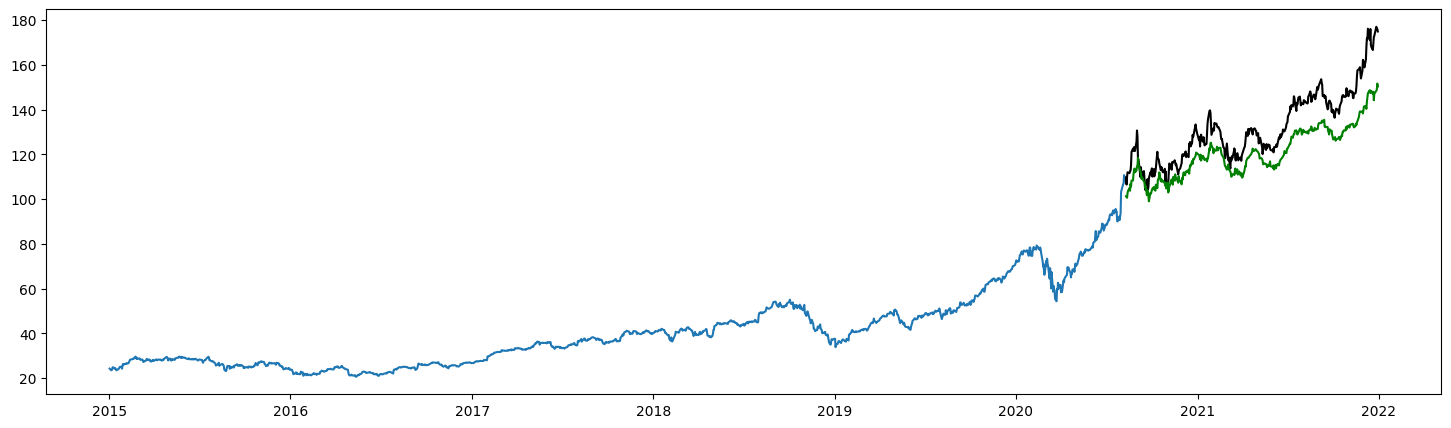

In [ ]:
# plotting RNN predictions
# ------------------------
plt.figure(figsize=(18,5))

plt.plot(train.index, train['Close'], label='Training')
plt.plot(pred_rnn.index, pred_rnn['Close'], label='Actual',color='black')
plt.plot(pred_rnn.index, pred_rnn['RNN_pred'], label='RNN Predicted',color='green')


In [ ]:
# Building a LSTM
#################

# initialize the LSTM model
lstm_model = Sequential()

# Add a simple RNN layer
lstm_model.add(LSTM(units=50, input_shape=(x_train.shape[1],1))) #return_sequences=True))
lstm_model.add(Dropout(0.2)) # Added dropout to avoid overfitting

'''
# Add another LSTM layer
lstm_model.add(LSTM(units=50))
lstm_model.add(Dropout(0.2)) # Added dropout to avoid overfitting
'''

# Add a output layer
lstm_model.add(Dense(units=1))

# compile the model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')


# train the model
lstm_history = lstm_model.fit(x_train, y_train, batch_size=32, epochs=30, validation_split=0.1)



Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0050 - val_loss: 8.3895e-04
Epoch 2/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 3.1757e-04 - val_loss: 7.8404e-04
Epoch 3/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 2.4892e-04 - val_loss: 6.7073e-04
Epoch 4/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 2.1716e-04 - val_loss: 6.4962e-04
Epoch 5/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 2.4776e-04 - val_loss: 6.0385e-04
Epoch 6/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 1.9352e-04 - val_loss: 6.0210e-04
Epoch 7/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 1.8123e-04 - val_loss: 5.5519e-04
Epoch 8/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 1.6184e-04 - val_loss: 5.5586e-04
Epoch 9/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 1.6232e-04 - val_loss: 5.1838e-04
Epoch 10/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 1.6777e-04 - val_loss: 5.0960e-04
Epoch 11/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 1.6209e-04 - val_loss: 5

<ipython-input-46-b6713ea8bf7b>:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


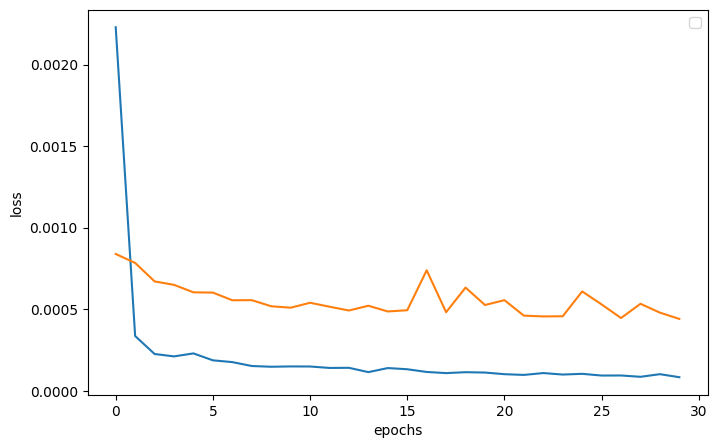

In [ ]:
# visualizing Loss from training history
# --------------------------------------
plt.figure(figsize=(8,5))

plt.plot(lstm_history.history['loss'])
plt.plot(lstm_history.history['val_loss'])

plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()


In [ ]:
# perform predictions
# -------------------
lstm_predictions = lstm_model.predict(x_test)
lstm_predictions = scaler.inverse_transform(lstm_predictions)
lstm_predictions

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


array([[108.217804],
       [110.51696 ],
       [111.81429 ],
       [113.09704 ],
       [114.328606],
       [115.249146],
       [115.811615],
       [116.229744],
       [116.45087 ],
       [116.899025],
       [118.25703 ],
       [119.95063 ],
       [121.45709 ],
       [123.04239 ],
       [124.18542 ],
       [124.98575 ],
       [126.17195 ],
       [128.0627  ],
       [129.47246 ],
       [128.89117 ],
       [127.70359 ],
       [124.85444 ],
       [122.37446 ],
       [119.402534],
       [116.34597 ],
       [114.114265],
       [112.42726 ],
       [110.69962 ],
       [109.04036 ],
       [107.141594],
       [106.00158 ],
       [105.55433 ],
       [104.77989 ],
       [104.349976],
       [104.78706 ],
       [105.96543 ],
       [107.264244],
       [108.88949 ],
       [110.66831 ],
       [111.75145 ],
       [113.07881 ],
       [113.70408 ],
       [114.318634],
       [114.725006],
       [115.2731  ],
       [116.92488 ],
       [118.168884],
       [119.2

In [ ]:
# calculate RMSE for LSTM
#------------------------
lstm_mse = root_mean_squared_error(lstm_predictions, y_test)
print(f'LSTM model MSE:{lstm_mse}')

LSTM model MSE:4.215756900926915


In [ ]:
lstm_rmse = lstm_mse

In [ ]:
# merge act-pred to visualize in single graph
# -------------------------------------------
train = data[:training_data_len]
pred_lstm = data[training_data_len:].copy()
pred_lstm['LSTM_pred'] = lstm_predictions
print(pred_lstm)

                 Close   LSTM_pred
Date                              
2020-08-10  109.776489  108.217804
2020-08-11  106.511749  110.516960
2020-08-12  110.051605  111.814293
2020-08-13  111.999245  113.097038
2020-08-14  111.899422  114.328606
...                ...         ...
2021-12-23  173.021545  176.919571
2021-12-27  176.996704  176.836548
2021-12-28  175.975937  177.560211
2021-12-29  176.064285  178.294846
2021-12-30  174.906082  179.072174

[352 rows x 2 columns]


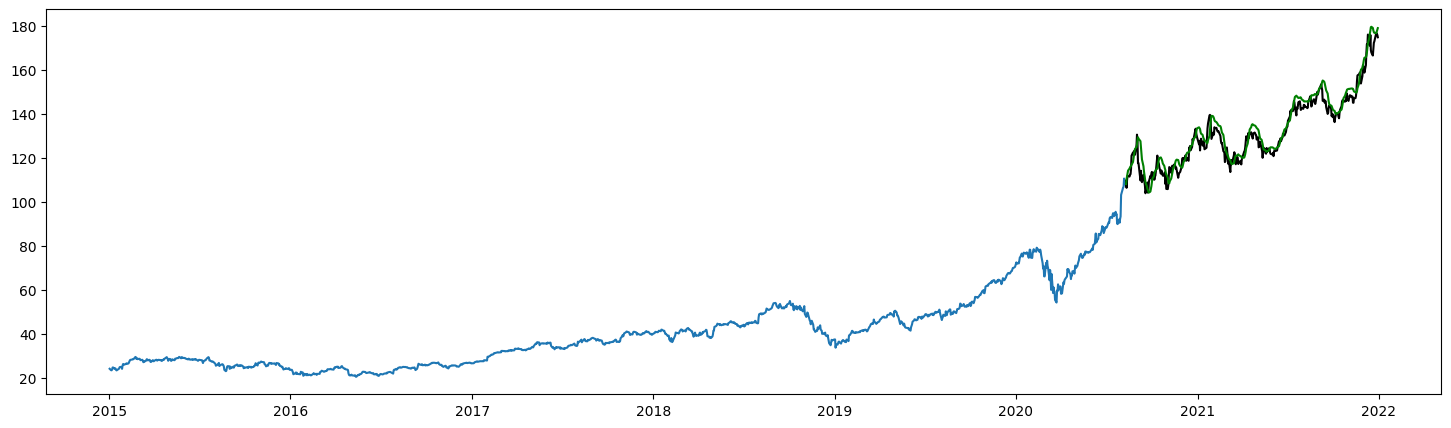

In [ ]:
# Visualize the predictions
###########################
plt.figure(figsize=(18,5))

plt.plot(train.index, train['Close'], label='Training')
plt.plot(pred_lstm.index, pred_lstm['Close'], label='Actual',color='black')
plt.plot(pred_lstm.index, pred_lstm['LSTM_pred'], label='LSTM Predicted',color='green')


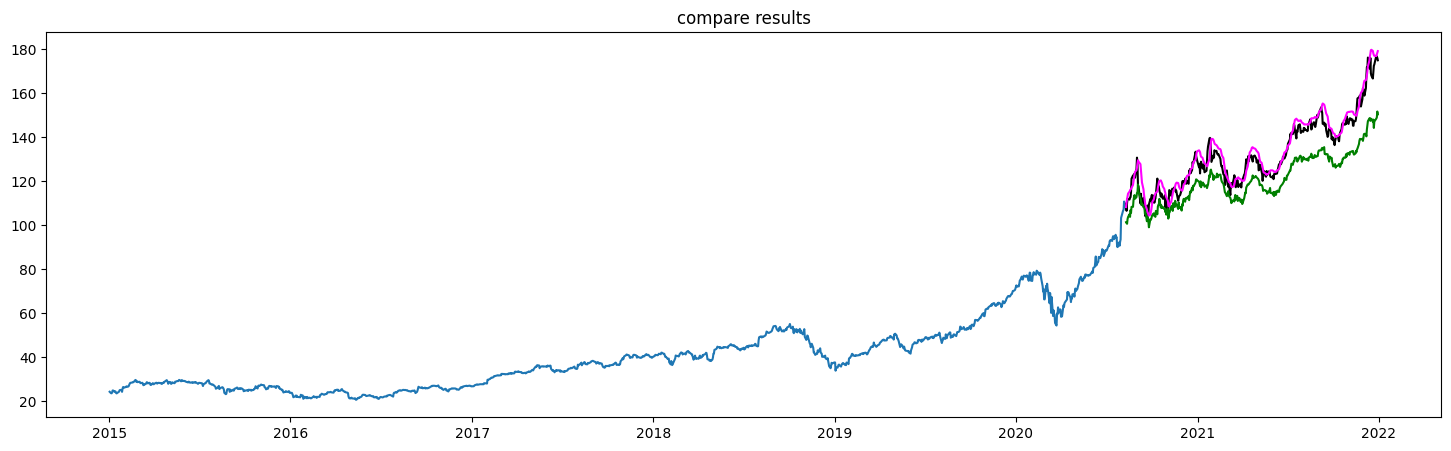

In [ ]:
# results comparison of RNN & LSTM
####################################

plt.figure(figsize=(18,5))

plt.title('compare results')
plt.plot(train.index, train['Close'], label='Training')
plt.plot(pred_lstm.index, pred_lstm['Close'], label='Actual',color='black')

plt.plot(pred_rnn.index, pred_rnn['RNN_pred'], label='RNN Predicted',color='green')
plt.plot(pred_lstm.index, pred_lstm['LSTM_pred'], label='LSTM Predicted',color='magenta')

In [ ]:
# analyze the difference in both models
#########################################

print(f'RNN  RMSE with 30 epochs: {rnn_rmse}')
print(f'LSTM RMSE with 30 epochs: {lstm_rmse}')

if lstm_rmse < rnn_rmse:
  res = ((rnn_rmse - lstm_rmse)/rnn_rmse) *100
  print(f'LSTM impproved prediction accuracy by {res}% compared to RNN with 30 epochs')
else:
  res = ((lstm_rmse - rnn_rmse)/lstm_rmse) *100
  print(f'RNN impproved prediction accuracy by {res}% compared to LSTM with 30 epochs')

RNN  RMSE with 30 epochs: 12.197676270260441
LSTM RMSE with 30 epochs: 4.215756900926915
LSTM impproved prediction accuracy by 65.4380325603042% compared to RNN with 30 epochs
